In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
import os

In [70]:
# Função para padronizar os nomes
def padronizar_nome(nome):
    # Remover acentos e caracteres especiais
    nome = unicodedata.normalize('NFKD', nome).encode('ascii', 'ignore').decode('utf-8')
    # Converter para letras maiúsculas
    nome = nome.upper()
    # Remover espaços extras
    nome = nome.strip()
    return nome

# Leitura dos arquivos

In [71]:
# Leitura dos dados de Censo do IBGE de 2022

df_censo = pd.read_csv('./dados/censo.csv', header=0, sep=';')
df_censo.info()
df_censo.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CD_REGIAO      5570 non-null   int64 
 1   NM_REGIAO      5570 non-null   object
 2   CD_UF          5570 non-null   int64 
 3   NM_UF          5570 non-null   object
 4   CD_MUN         5570 non-null   int64 
 5   NM_MUN         5570 non-null   object
 6   Total_setores  5570 non-null   int64 
 7   v0001          5570 non-null   int64 
 8   v0002          5570 non-null   int64 
 9   v0003          5570 non-null   int64 
 10  v0004          5570 non-null   int64 
 11  v0005          5570 non-null   object
 12  v0006          5195 non-null   object
 13  v0007          5570 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 609.3+ KB


,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,Total_setores,v0001,v0002,v0003,v0004,v0005,v0006,v0007
0,1,Norte,11,Rondônia,1100015,Alta Floresta D'Oeste,73,21494,10081,10062,19,"2,785686453","2,948434862",7699
1,1,Norte,11,Rondônia,1100023,Ariquemes,151,96833,44157,44114,43,"2,765064397","4,381324747",34784
2,1,Norte,11,Rondônia,1100031,Cabixi,15,5351,2927,2921,6,"2,720386375","4,931367565",1967
3,1,Norte,11,Rondônia,1100049,Cacoal,154,86887,40930,40905,25,"2,709561241","2,571169083",31931
4,1,Norte,11,Rondônia,1100056,Cerejeiras,31,15890,7069,7064,5,"2,689754935","3,931245745",5876


In [72]:
## Leitura do dicionário de dados

df_dicionario = pd.read_csv('./dados/dicionario_censo_1.csv')
df_dicionario.head(5)

,VARIÁVEL,TIPO,TAMANHO,DESCRIÇÃO
0,CD_SETOR,texto,16.0,Geocódigo de Setor Censitário
1,AREA_KM2,real,NaN,Área do Setor Censitário em quilômetros quadrados
2,CD_REGIAO,numérico,1.0,Código das Grandes Regiões (Regiões Geográficas)
3,NM_REGIAO,texto,15.0,Nome das Grandes Regiões (Regiões Geográficas)
4,CD_UF,numérico,2.0,Código da Unidade da Federação


In [73]:
# Leitura dos dados de IDH 2010

df_idh = pd.read_csv('./dados/idh.csv',header=0, sep=';')
df_idh.info()
df_idh.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Territorialidades  188 non-null    object
 1   IDHM 2010          186 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


,Territorialidades,IDHM 2010
0,Brasil,"0,727"
1,Abaiara (CE),"0,628"
2,Acarape (CE),"0,606"
3,Acaraú (CE),"0,601"
4,Acopiara (CE),"0,595"


In [74]:
# Leitura dos dados de votação 2022

df_votos = pd.read_csv('./dados/votos.csv', encoding='latin1', header=0, sep=';')
df_votos.info()
df_votos.head(5)
# df_votos['NM_MUNICIPIO'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509903 entries, 0 to 2509902
Data columns (total 26 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   DT_GERACAO                 object
 1   HH_GERACAO                 object
 2   ANO_ELEICAO                int64 
 3   CD_TIPO_ELEICAO            int64 
 4   NM_TIPO_ELEICAO            object
 5   NR_TURNO                   int64 
 6   CD_ELEICAO                 int64 
 7   DS_ELEICAO                 object
 8   DT_ELEICAO                 object
 9   TP_ABRANGENCIA             object
 10  SG_UF                      object
 11  SG_UE                      object
 12  NM_UE                      object
 13  CD_MUNICIPIO               int64 
 14  NM_MUNICIPIO               object
 15  NR_ZONA                    int64 
 16  NR_SECAO                   int64 
 17  CD_CARGO                   int64 
 18  DS_CARGO                   object
 19  NR_VOTAVEL                 int64 
 20  NM_VOTAVEL              

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_SECAO,CD_CARGO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_LOCAL_VOTACAO,SQ_CANDIDATO,NM_LOCAL_VOTACAO,DS_LOCAL_VOTACAO_ENDERECO
0,01/11/2022,16:05:25,2022,2,ELEIÃÃO ORDINÃRIA,1,546,ELEIÃÃES GERAIS ESTADUAIS 2022,02/10/2022,E,...,6,6,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,4,1023,60001608890,CENTRO COMUNITARIO CONJUNTO SAO FRANCISCO,RUA ILHA DO BOTE 367
1,01/11/2022,16:05:25,2022,2,ELEIÃÃO ORDINÃRIA,1,546,ELEIÃÃES GERAIS ESTADUAIS 2022,02/10/2022,E,...,266,6,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,13,1546,60001608890,ESCOLA MUNICIPAL ZINA MOREIRA,TIMBAUBA NOSSA SENHORA DAS DORES
2,01/11/2022,16:05:25,2022,2,ELEIÃÃO ORDINÃRIA,1,546,ELEIÃÃES GERAIS ESTADUAIS 2022,02/10/2022,E,...,119,6,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,3,1058,60001608890,EEM ENGENHEIRO AGEU ROMERO,RUA EVARISTO GOMES 143
3,01/11/2022,16:05:25,2022,2,ELEIÃÃO ORDINÃRIA,1,546,ELEIÃÃES GERAIS ESTADUAIS 2022,02/10/2022,E,...,25,6,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,2,1082,60001608890,EEFM CORONEL MURILO SERPA,RUA ANASTACIO BARROSO VALENTE 318
4,01/11/2022,16:05:25,2022,2,ELEIÃÃO ORDINÃRIA,1,546,ELEIÃÃES GERAIS ESTADUAIS 2022,02/10/2022,E,...,228,6,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,4,1058,60001608890,E.E.F. MARIA LINDA DA GLÃRIA,DISTRITO FLAMENGO


In [75]:
# Leitura dos dados de furtos 2009 a 2023

df_furtos = pd.read_csv('./dados/furtos.csv', header=0, sep=',')
df_furtos.info()
df_furtos.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798101 entries, 0 to 798100
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   AIS            798101 non-null  object
 1   Município      798101 non-null  object
 2   Dia da Semana  798101 non-null  object
 3   Data           798101 non-null  object
 4   Hora           798101 non-null  object
dtypes: object(5)
memory usage: 30.4+ MB


,AIS,Município,Dia da Semana,Data,Hora
0,AIS 05,Fortaleza,Quinta,1-Jan-09,12:00:00 AM
1,AIS 05,Fortaleza,Quinta,1-Jan-09,12:00:00 AM
2,AIS 05,Fortaleza,Quinta,1-Jan-09,12:00:00 AM
3,AIS 05,Fortaleza,Quinta,1-Jan-09,12:00:00 AM
4,AIS 05,Fortaleza,Quinta,1-Jan-09,12:00:00 AM


In [76]:
df_mapas_uf = pd.read_csv('./dados/mapas_uf.csv', header=0, sep=',')
df_mapas_uf.info()
df_mapas_uf.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_uf      27 non-null     int64 
 1   sigla_uf   27 non-null     object
 2   geometria  27 non-null     object
dtypes: int64(1), object(2)
memory usage: 780.0+ bytes


,id_uf,sigla_uf,geometria
0,13,AM,"POLYGON((-67.3305623597076 2.06126594616903, -..."
1,17,TO,"POLYGON((-48.3681565220881 -5.16857194577177, ..."
2,26,PE,MULTIPOLYGON(((-32.3988144901827 -3.8289620220...
3,51,MT,"POLYGON((-54.891531198086 -17.6213747173965, -..."
4,15,PA,MULTIPOLYGON(((-46.465471985428 -0.95986049519...


In [77]:
df_mapas_municipio = pd.read_csv('./dados/mapas_municipio.csv', header=0, sep=',')
df_mapas_municipio.info()
df_mapas_municipio.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_municipio  5570 non-null   int64 
 1   sigla_uf      5570 non-null   object
 2   geometria     5570 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


,id_municipio,sigla_uf,geometria
0,1200336,AC,"POLYGON((-73.801558115 -7.111824379, -73.79209..."
1,1200385,AC,"POLYGON((-67.124663651 -9.969853, -67.16561695..."
2,1200328,AC,"POLYGON((-71.566051804 -8.648094841, -71.57330..."
3,1200203,AC,"POLYGON((-72.900313047 -7.437681232, -72.88910..."
4,1200104,AC,"POLYGON((-69.131563493 -10.385028002, -69.1493..."


In [78]:
df_diretorios_uf = pd.read_csv('./dados/diretorios_uf.csv', header=0, sep=',')
df_diretorios_uf.info()
df_diretorios_uf.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id_uf   27 non-null     int64 
 1   sigla   27 non-null     object
 2   nome    27 non-null     object
 3   regiao  27 non-null     object
dtypes: int64(1), object(3)
memory usage: 996.0+ bytes


,id_uf,sigla,nome,regiao
0,42,SC,Santa Catarina,Sul
1,41,PR,Paraná,Sul
2,43,RS,Rio Grande do Sul,Sul
3,11,RO,Rondônia,Norte
4,13,AM,Amazonas,Norte


In [79]:
df_diretorios_municipio = pd.read_csv('./dados/diretorios_municipio.csv', header=0, sep=',')
df_diretorios_municipio.info()
df_diretorios_municipio.head(5)
df_diretorios_municipio['nome']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id_municipio               5570 non-null   int64 
 1   id_municipio_6             5570 non-null   int64 
 2   id_municipio_tse           5570 non-null   int64 
 3   id_municipio_rf            5570 non-null   int64 
 4   id_municipio_bcb           5570 non-null   int64 
 5   nome                       5570 non-null   object
 6   capital_uf                 5570 non-null   int64 
 7   id_comarca                 5570 non-null   int64 
 8   id_regiao_saude            5570 non-null   int64 
 9   nome_regiao_saude          5570 non-null   object
 10  id_regiao_imediata         5570 non-null   int64 
 11  nome_regiao_imediata       5570 non-null   object
 12  id_regiao_intermediaria    5570 non-null   int64 
 13  nome_regiao_intermediaria  5570 non-null   object
 14  id_micro

0              Nova Mamoré
1              Porto Velho
2          Itapuã do Oeste
3       Candeias do Jamari
4                  Cujubim
               ...        
5565           Gouvelândia
5566          Paranaiguara
5567          Quirinópolis
5568             São Simão
5569              Brasília
Name: nome, Length: 5570, dtype: object

# Tratamento dos dados

In [80]:
# Aplicar a função nas colunas de nome de município de ambas as tabelas
df_votos['NM_MUNICIPIO'] = df_votos['NM_MUNICIPIO'].apply(padronizar_nome)
df_diretorios_municipio['nome'] = df_diretorios_municipio['nome'].apply(padronizar_nome)

# Verificar a padronização
print(df_votos['NM_MUNICIPIO'].unique())
print(df_diretorios_municipio['nome'].unique())

# df_diretorios_municipio.info()

['FORTALEZA' 'RUSSAS' 'PARAIPABA' 'ITAPIPOCA' 'SABOEIRO' 'PACAJUS' 'TAUA'
 'GRANJA' 'BARREIRA' 'BATURITA' 'IGUATU' 'COREAA' 'MARACANAA' 'QUIXELA'
 'CAUCAIA' 'JUAZEIRO DO NORTE' 'MARANGUAPE' 'UBAJARA' 'CHOROZINHO'
 'BREJO SANTO' 'SOBRAL' 'BARBALHA' 'BOA VIAGEM' 'TURURU'
 'JIJOCA DE JERICOACOARA' 'PEDRA BRANCA' 'OCARA' 'IRAUAUBA' 'FORTIM'
 'PACATUBA' 'QUIXADA' 'MOMBAAA' 'ACOPIARA' 'MASSAPA' 'CATUNDA' 'ARACATI'
 'ITAREMA' 'HORIZONTE' 'PENTECOSTE' 'TIANGUA' 'PARACURU'
 'SAO LUAS DO CURU' 'BANABUIA' 'ACARAA' 'QUIXERAMOBIM' 'QUIXERA' 'CRUZ'
 'JAGUARETAMA' 'CAPISTRANO' 'UMIRIM' 'ITAPAJA' 'MULUNGU'
 'LAVRAS DA MANGABEIRA' 'VARZEA ALEGRE' 'ITAPIANA' 'NOVA RUSSAS' 'AQUIRAZ'
 'ANTONINA DO NORTE' 'CHAVAL' 'CAMOCIM' 'MORADA NOVA' 'MAURITI' 'CASCAVEL'
 'CRATEAS' 'JAGUARIBE' 'CARIRIAAU' 'IBICUITINGA' 'BEBERIBE' 'TRAIRI'
 'CARIDADE' 'CANINDA' 'PARAMOTI' 'URUBURETAMA' 'SAO GONAALO DO AMARANTE'
 'ARACOIABA' 'PIRES FERREIRA' 'EUSABIO' 'MUCAMBO' 'FARIAS BRITO'
 'MISSAO VELHA' 'CROATA' 'CEDRO' 'QUITERIANAP

### Idh

- divisão da coluna `Territorialidades` em `Estado` e `Cidade`
- renomeação das colunas

In [81]:
import numpy as np

df_idh['estado'] = df_idh['Territorialidades'].str.split('(').str[1].str.split(')').str[0]
df_idh['cidade'] = df_idh['Territorialidades'].str.split('(').str[0]

df_idh.rename(columns={'IDHM 2010': 'idh', 'Territorialidades': 'territorialidades'}, inplace=True)
df_idh['idh'] = df_idh['idh'].str.replace(',', '.').replace(' ', np.nan).astype(float)

df_idh.head(5)

,territorialidades,idh,estado,cidade
0,Brasil,0.727,NaN,Brasil
1,Abaiara (CE),0.628,CE,Abaiara
2,Acarape (CE),0.606,CE,Acarape
3,Acaraú (CE),0.601,CE,Acaraú
4,Acopiara (CE),0.595,CE,Acopiara


### Censo

- renomeação das colunas

In [82]:
# Criar um dicionário de mapeamento a partir do df_dicionario
mapping = {
    'CD_REGIAO': 'codigo_regiao',
    'NM_REGIAO': 'nome_regiao',
    'CD_UF': 'codigo_uf',
    'NM_UF': 'nome_uf',
    'CD_MUNICIPIO': 'codigo_municipio',
    'NM_MUNICIPIO': 'nome_municipio',
    'Total_setores': 'total_setores',
    'v0001': 'total_pessoas',
    'v0002': 'total_domicilios',
    'v0003': 'total_domicilios_particulares',
    'v0004': 'total_domicilios_coletivos',
    'v0005': 'media_moradores_domicilio_particular_ocupado',
    'v0006': 'percentual_domicilios_particulares_ocupados',
    'v0007': 'total_domicilios_particulares_ocupados',
}

# Renomear as colunas do df_censo
df_censo = df_censo.rename(columns=mapping)
df_censo.head(5)

,codigo_regiao,nome_regiao,codigo_uf,nome_uf,CD_MUN,NM_MUN,total_setores,total_pessoas,total_domicilios,total_domicilios_particulares,total_domicilios_coletivos,media_moradores_domicilio_particular_ocupado,percentual_domicilios_particulares_ocupados,total_domicilios_particulares_ocupados
0,1,Norte,11,Rondônia,1100015,Alta Floresta D'Oeste,73,21494,10081,10062,19,"2,785686453","2,948434862",7699
1,1,Norte,11,Rondônia,1100023,Ariquemes,151,96833,44157,44114,43,"2,765064397","4,381324747",34784
2,1,Norte,11,Rondônia,1100031,Cabixi,15,5351,2927,2921,6,"2,720386375","4,931367565",1967
3,1,Norte,11,Rondônia,1100049,Cacoal,154,86887,40930,40905,25,"2,709561241","2,571169083",31931
4,1,Norte,11,Rondônia,1100056,Cerejeiras,31,15890,7069,7064,5,"2,689754935","3,931245745",5876


### Votos

- renomeação das colunas

In [83]:
df_votos.rename(columns={
    'CD_MUNICIPIO': 'codigo_municipio',
    'NM_MUNICIPIO': 'nome_municipio',
    'NM_VOTAVEL': 'nome_candidato',
    'QT_VOTOS': 'total_votos'
}, inplace=True)

### Furtos

- mudança do tipo de dado da coluna `Data` para `datetime`
- criação da coluna `Ano` a partir da coluna `Data`
- renomeação das colunas

In [84]:
df_furtos['Data'] = df_furtos['Data'] = pd.to_datetime(df_furtos['Data'], format='%d-%b-%y', dayfirst=True)
df_furtos['ano'] = df_furtos['Data'].dt.year

df_furtos.rename(columns={
    'Município': 'nome_municipio',
    'Dia da Semana': 'dia_semana',
    'Data': 'data',
    'Hora': 'hora'
}, inplace=True)

### UFs

In [85]:
df_mapas_uf.rename(columns={
    'sigla_uf': 'SG_UF',
}, inplace=True)

df_mapas_uf.head(5)

,id_uf,SG_UF,geometria
0,13,AM,"POLYGON((-67.3305623597076 2.06126594616903, -..."
1,17,TO,"POLYGON((-48.3681565220881 -5.16857194577177, ..."
2,26,PE,MULTIPOLYGON(((-32.3988144901827 -3.8289620220...
3,51,MT,"POLYGON((-54.891531198086 -17.6213747173965, -..."
4,15,PA,MULTIPOLYGON(((-46.465471985428 -0.95986049519...


### Municípios

In [86]:
df_mapas_municipio.rename(columns={
    'sigla_uf': 'SG_UF',
}, inplace=True)

df_mapas_municipio.head(5)

,id_municipio,SG_UF,geometria
0,1200336,AC,"POLYGON((-73.801558115 -7.111824379, -73.79209..."
1,1200385,AC,"POLYGON((-67.124663651 -9.969853, -67.16561695..."
2,1200328,AC,"POLYGON((-71.566051804 -8.648094841, -71.57330..."
3,1200203,AC,"POLYGON((-72.900313047 -7.437681232, -72.88910..."
4,1200104,AC,"POLYGON((-69.131563493 -10.385028002, -69.1493..."


### Diretórios UF

In [87]:
df_diretorios_uf.rename(columns={
    'sigla': 'SG_UF',
}, inplace=True)

df_diretorios_uf.head(5)

,id_uf,SG_UF,nome,regiao
0,42,SC,Santa Catarina,Sul
1,41,PR,Paraná,Sul
2,43,RS,Rio Grande do Sul,Sul
3,11,RO,Rondônia,Norte
4,13,AM,Amazonas,Norte


### Diretórios Município

In [88]:
df_diretorios_municipio.rename(columns={
    'nome': 'nome_municipio',
    'sigla_uf': 'SG_UF'
}, inplace=True)

df_diretorios_municipio.head(5)

,id_municipio,id_municipio_6,id_municipio_tse,id_municipio_rf,id_municipio_bcb,nome_municipio,capital_uf,id_comarca,id_regiao_saude,nome_regiao_saude,...,nome_mesorregiao,id_regiao_metropolitana,nome_regiao_metropolitana,ddd,id_uf,SG_UF,nome_uf,nome_regiao,amazonia_legal,centroide
0,1100338,110033,434,47,44516,NOVA MAMORE,0,1100106,11004,Madeira-Mamoré,...,Madeira-Guaporé,NaN,NaN,69,11,RO,Rondônia,Norte,1,POINT(-64.6295025002404 -10.3822863210755)
1,1100205,110020,35,3,30719,PORTO VELHO,1,1100205,11004,Madeira-Mamoré,...,Madeira-Guaporé,101,Região Metropolitana de Porto Velho,69,11,RO,Rondônia,Norte,1,POINT(-64.3041357999869 -9.15394033687075)
2,1101104,110110,493,683,46851,ITAPUA DO OESTE,0,1100205,11004,Madeira-Mamoré,...,Madeira-Guaporé,NaN,NaN,69,11,RO,Rondônia,Norte,1,POINT(-63.044960463046 -9.17019402601564)
3,1100809,110080,477,681,46961,CANDEIAS DO JAMARI,0,1100205,11004,Madeira-Mamoré,...,Madeira-Guaporé,101,Região Metropolitana de Porto Velho,69,11,RO,Rondônia,Norte,1,POINT(-63.3254198532114 -8.88702392955617)
4,1100940,110094,680,8,56652,CUJUBIM,0,1100023,11001,Vale do Jamari,...,Madeira-Guaporé,NaN,NaN,69,11,RO,Rondônia,Norte,1,POINT(-62.5652673033848 -9.1709863446154)


# Filtro de dados

### Votos

- filtrar dados de votos para Deputados Federais

In [89]:
df_votos = df_votos[df_votos['DS_CARGO']=='DEPUTADO FEDERAL'].reset_index(drop=True)
df_votos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056847 entries, 0 to 1056846
Data columns (total 26 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   DT_GERACAO                 1056847 non-null  object
 1   HH_GERACAO                 1056847 non-null  object
 2   ANO_ELEICAO                1056847 non-null  int64 
 3   CD_TIPO_ELEICAO            1056847 non-null  int64 
 4   NM_TIPO_ELEICAO            1056847 non-null  object
 5   NR_TURNO                   1056847 non-null  int64 
 6   CD_ELEICAO                 1056847 non-null  int64 
 7   DS_ELEICAO                 1056847 non-null  object
 8   DT_ELEICAO                 1056847 non-null  object
 9   TP_ABRANGENCIA             1056847 non-null  object
 10  SG_UF                      1056847 non-null  object
 11  SG_UE                      1056847 non-null  object
 12  NM_UE                      1056847 non-null  object
 13  codigo_municipio           

### Censo

- filtrar dados de censo para o Estado de Ceará

In [90]:
df_censo = df_censo[df_censo['nome_uf'] == 'Ceará'].reset_index(drop=True)
df_censo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   codigo_regiao                                 184 non-null    int64 
 1   nome_regiao                                   184 non-null    object
 2   codigo_uf                                     184 non-null    int64 
 3   nome_uf                                       184 non-null    object
 4   CD_MUN                                        184 non-null    int64 
 5   NM_MUN                                        184 non-null    object
 6   total_setores                                 184 non-null    int64 
 7   total_pessoas                                 184 non-null    int64 
 8   total_domicilios                              184 non-null    int64 
 9   total_domicilios_particulares                 184 non-null    int64 
 10  to

### Mapas

In [91]:
df_mapas_uf = df_mapas_uf[df_mapas_uf['SG_UF'] == 'CE'].reset_index(drop=True)
df_mapas_uf.info()
df_mapas_uf.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_uf      1 non-null      int64 
 1   SG_UF      1 non-null      object
 2   geometria  1 non-null      object
dtypes: int64(1), object(2)
memory usage: 156.0+ bytes


,id_uf,SG_UF,geometria
0,23,CE,"POLYGON((-41.1775766682825 -4.46769665097272, ..."


In [92]:
df_mapas_municipio = df_mapas_municipio[df_mapas_municipio['SG_UF'] == 'CE'].reset_index(drop=True)
df_mapas_municipio.info()
df_mapas_municipio.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_municipio  184 non-null    int64 
 1   SG_UF         184 non-null    object
 2   geometria     184 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.4+ KB


,id_municipio,SG_UF,geometria
0,2302503,CE,"POLYGON((-38.940520466 -7.427975185, -39.07819..."
1,2304657,CE,"POLYGON((-40.76147804 -3.95063271500001, -40.7..."
2,2306108,CE,"POLYGON((-39.784873661 -3.631059518, -39.78686..."
3,2311355,CE,"POLYGON((-39.018526315 -6.00522936199999, -39...."
4,2303006,CE,"POLYGON((-38.984159556 -4.044386322, -39.00354..."


In [93]:
df_diretorios_uf = df_diretorios_uf[df_diretorios_uf['SG_UF'] == 'CE'].reset_index(drop=True)
df_diretorios_uf.info()
df_diretorios_uf.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id_uf   1 non-null      int64 
 1   SG_UF   1 non-null      object
 2   nome    1 non-null      object
 3   regiao  1 non-null      object
dtypes: int64(1), object(3)
memory usage: 164.0+ bytes


,id_uf,SG_UF,nome,regiao
0,23,CE,Ceará,Nordeste


In [94]:
df_diretorios_municipio = df_diretorios_municipio[df_diretorios_municipio['SG_UF'] == 'CE'].reset_index(drop=True)
df_diretorios_municipio.info()
df_diretorios_municipio.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id_municipio               184 non-null    int64 
 1   id_municipio_6             184 non-null    int64 
 2   id_municipio_tse           184 non-null    int64 
 3   id_municipio_rf            184 non-null    int64 
 4   id_municipio_bcb           184 non-null    int64 
 5   nome_municipio             184 non-null    object
 6   capital_uf                 184 non-null    int64 
 7   id_comarca                 184 non-null    int64 
 8   id_regiao_saude            184 non-null    int64 
 9   nome_regiao_saude          184 non-null    object
 10  id_regiao_imediata         184 non-null    int64 
 11  nome_regiao_imediata       184 non-null    object
 12  id_regiao_intermediaria    184 non-null    int64 
 13  nome_regiao_intermediaria  184 non-null    object
 14  id_microrr

,id_municipio,id_municipio_6,id_municipio_tse,id_municipio_rf,id_municipio_bcb,nome_municipio,capital_uf,id_comarca,id_regiao_saude,nome_regiao_saude,...,nome_mesorregiao,id_regiao_metropolitana,nome_regiao_metropolitana,ddd,id_uf,SG_UF,nome_uf,nome_regiao,amazonia_legal,centroide
0,2308906,230890,14796,1479,39882,MORRINHOS,0,2308906,23012,12ª Região Acaraú,...,Noroeste Cearense,NaN,NaN,88,23,CE,Ceará,Nordeste,0,POINT(-40.0912592590751 -3.28414982234069)
1,2307908,230790,14591,1459,15387,MARTINOPOLE,0,2313906,23016,16ª Região Camocim,...,Noroeste Cearense,NaN,NaN,88,23,CE,Ceará,Nordeste,0,POINT(-40.6475432371398 -3.16909619690766)
2,2307254,230725,13005,985,55512,JIJOCA DE JERICOACOARA,0,2307254,23012,12ª Região Acaraú,...,Noroeste Cearense,NaN,NaN,88,23,CE,Ceará,Nordeste,0,POINT(-40.4945113068936 -2.87872541898898)
3,2306553,230655,15954,1595,42336,ITAREMA,0,2306553,23012,12ª Região Acaraú,...,Noroeste Cearense,NaN,NaN,88,23,CE,Ceará,Nordeste,0,POINT(-39.889228471988 -3.04919822403069)
4,2302305,230230,13455,1345,11594,BELA CRUZ,0,2302305,23012,12ª Região Acaraú,...,Noroeste Cearense,NaN,NaN,88,23,CE,Ceará,Nordeste,0,POINT(-40.3079812473698 -3.05312040153093)


### IDH 

In [95]:
df_idh = df_idh[df_idh['idh'].notna()].reset_index(drop=True)
df_idh

,territorialidades,idh,estado,cidade
0,Brasil,0.727,NaN,Brasil
1,Abaiara (CE),0.628,CE,Abaiara
2,Acarape (CE),0.606,CE,Acarape
3,Acaraú (CE),0.601,CE,Acaraú
4,Acopiara (CE),0.595,CE,Acopiara
...,...,...,...,...
180,Uruburetama (CE),0.639,CE,Uruburetama
181,Uruoca (CE),0.566,CE,Uruoca
182,Varjota (CE),0.611,CE,Varjota
183,Várzea Alegre (CE),0.629,CE,Várzea Alegre


# Agrergação dos dados

### Votos

- agrupar votos por cidade e candidato

In [96]:
df_votos_agrupados = df_votos.groupby(['codigo_municipio','nome_municipio', 'nome_candidato'])[['total_votos']].sum().reset_index()
df_votos_agrupados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32017 entries, 0 to 32016
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   codigo_municipio  32017 non-null  int64 
 1   nome_municipio    32017 non-null  object
 2   nome_candidato    32017 non-null  object
 3   total_votos       32017 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1000.7+ KB


### Furtos

- agrupar furtos por cidade e ano

In [97]:
df_furtos_agrupados = df_furtos.groupby(['nome_municipio', 'ano']).size().reset_index()
df_furtos_agrupados.rename(columns={0: 'total_furtos'}, inplace=True)
df_furtos_agrupados

,nome_municipio,ano,total_furtos
0,Abaiara,2010,3
1,Abaiara,2011,4
2,Abaiara,2012,6
3,Abaiara,2013,9
4,Abaiara,2014,8
...,...,...,...
2692,Várzea Alegre,2019,118
2693,Várzea Alegre,2020,91
2694,Várzea Alegre,2021,97
2695,Várzea Alegre,2022,139


# Exploração dos dados

In [98]:
df_votos_agrupados[['total_votos']].describe()

,total_votos
count,32017.000000
mean,175.639504
std,1636.398747
min,1.000000
25%,2.000000
50%,5.000000
75%,28.000000
max,119326.000000


In [99]:
df_idh[['idh']].describe()

,idh
count,185.000000
mean,0.617227
std,0.032610
min,0.540000
25%,0.599000
50%,0.612000
75%,0.633000
max,0.754000


In [100]:
df_censo.describe()

,codigo_regiao,codigo_uf,CD_MUN,total_setores,total_pessoas,total_domicilios,total_domicilios_particulares,total_domicilios_coletivos,total_domicilios_particulares_ocupados
count,184.0,184.0,1.840000e+02,184.000000,1.840000e+02,1.840000e+02,1.840000e+02,184.000000,184.000000
mean,2.0,23.0,2.307039e+06,107.663043,4.779868e+04,2.079351e+04,2.077517e+04,18.331522,16425.092391
std,0.0,0.0,4.038662e+03,329.812806,1.817221e+05,7.737620e+04,7.733907e+04,53.273435,64280.096034
min,2.0,23.0,2.300101e+06,15.000000,4.841000e+03,2.019000e+03,2.019000e+03,0.000000,1541.000000
25%,2.0,23.0,2.303925e+06,37.750000,1.378725e+04,6.032750e+03,6.028750e+03,2.000000,4635.250000
50%,2.0,23.0,2.306752e+06,59.000000,2.091350e+04,9.451000e+03,9.450000e+03,5.000000,7180.500000
75%,2.0,23.0,2.310630e+06,105.000000,4.018400e+04,1.780900e+04,1.780075e+04,11.250000,13539.000000
max,2.0,23.0,2.314102e+06,4422.000000,2.428708e+06,1.034611e+06,1.034146e+06,465.000000,860747.000000


In [101]:
df_furtos_agrupados.describe()

,ano,total_furtos
count,2697.000000,2697.000000
mean,2016.138673,295.921765
std,4.270792,2359.379159
min,2009.000000,1.000000
25%,2013.000000,11.000000
50%,2016.000000,29.000000
75%,2020.000000,105.000000
max,2023.000000,38444.000000


## Gerar as tabelas finais

### Votos

In [102]:
votos = df_votos[['ANO_ELEICAO', 'CD_TIPO_ELEICAO', 'NM_TIPO_ELEICAO', 'NR_TURNO', 'DT_ELEICAO', 'SG_UE','NM_UE','codigo_municipio','nome_municipio','NR_ZONA', 'NR_SECAO', 'CD_CARGO', 'DS_CARGO', 'NR_VOTAVEL', 'nome_candidato', 'total_votos']]

votos.rename(columns={
    'ANO_ELEICAO': 'ano_eleicao',
    'CD_TIPO_ELEICAO': 'codigo_tipo_eleicao',
    'NM_TIPO_ELEICAO': 'nome_tipo_eleicao',
    'NR_TURNO': 'numero_turno',
    'SG_UE': 'sigla_uf',
    'NM_UE': 'nome_uf',
    'codigo_municipio': 'id_municipio',
    'NR_ZONA': 'numero_zona',
    'NR_SECAO': 'numero_secao',
    'CD_CARGO': 'codigo_cargo',
    'DS_CARGO': 'nome_cargo',
    'NR_VOTAVEL': 'numero_candidato',
    'total_votos': 'total_votos'
}, inplace=True)

votos.to_csv('tabelas/VOTOS.csv', index=False)

votos
votos.info()

C:\Users\joaov\AppData\Local\Temp\ipykernel_23076\3886834432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  votos.rename(columns={


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056847 entries, 0 to 1056846
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ano_eleicao          1056847 non-null  int64 
 1   codigo_tipo_eleicao  1056847 non-null  int64 
 2   nome_tipo_eleicao    1056847 non-null  object
 3   numero_turno         1056847 non-null  int64 
 4   DT_ELEICAO           1056847 non-null  object
 5   sigla_uf             1056847 non-null  object
 6   nome_uf              1056847 non-null  object
 7   id_municipio         1056847 non-null  int64 
 8   nome_municipio       1056847 non-null  object
 9   numero_zona          1056847 non-null  int64 
 10  numero_secao         1056847 non-null  int64 
 11  codigo_cargo         1056847 non-null  int64 
 12  nome_cargo           1056847 non-null  object
 13  numero_candidato     1056847 non-null  int64 
 14  nome_candidato       1056847 non-null  object
 15  total_votos    

In [103]:
votos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056847 entries, 0 to 1056846
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ano_eleicao          1056847 non-null  int64 
 1   codigo_tipo_eleicao  1056847 non-null  int64 
 2   nome_tipo_eleicao    1056847 non-null  object
 3   numero_turno         1056847 non-null  int64 
 4   DT_ELEICAO           1056847 non-null  object
 5   sigla_uf             1056847 non-null  object
 6   nome_uf              1056847 non-null  object
 7   id_municipio         1056847 non-null  int64 
 8   nome_municipio       1056847 non-null  object
 9   numero_zona          1056847 non-null  int64 
 10  numero_secao         1056847 non-null  int64 
 11  codigo_cargo         1056847 non-null  int64 
 12  nome_cargo           1056847 non-null  object
 13  numero_candidato     1056847 non-null  int64 
 14  nome_candidato       1056847 non-null  object
 15  total_votos    

### Candidatos

In [104]:
df_candidatos = df_votos[['nome_candidato', 'CD_CARGO','DS_CARGO', 'NR_VOTAVEL']].drop_duplicates().reset_index(drop=True)
df_candidatos.rename(columns={
    'CD_CARGO': 'codigo_cargo',
    'DS_CARGO': 'nome_cargo',
    'NR_VOTAVEL': 'numero_candidato'
}, inplace=True    
)

df_candidatos.to_csv('tabelas/CANDIDATOS.csv', index=False)

df_candidatos 

,nome_candidato,codigo_cargo,nome_cargo,numero_candidato
0,HEITOR RODRIGO PEREIRA FREIRE,6,DEPUTADO FEDERAL,4444
1,NATÃLIA SOARES RIOS,6,DEPUTADO FEDERAL,1232
2,ALANDERSON DE CASTRO MANGUEIRA,6,DEPUTADO FEDERAL,4012
3,MARIA ZULEIDE ALMEIDA DE SOUSA,6,DEPUTADO FEDERAL,3620
4,MARIA GUERRA DE FARIAS,6,DEPUTADO FEDERAL,4011
...,...,...,...,...
391,FRANCISCA ANTONIA DE SOUSA SILVA,6,DEPUTADO FEDERAL,1118
392,ANTONIO CLEDMILSON VIEIRA PINHEIRO,6,DEPUTADO FEDERAL,1855
393,INGRID NAYARA DO NASCIMENTO FERNANDES,6,DEPUTADO FEDERAL,2090
394,ENAIDE PAULINO DE SOUZA,6,DEPUTADO FEDERAL,1421


In [105]:
df_candidatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   nome_candidato    396 non-null    object
 1   codigo_cargo      396 non-null    int64 
 2   nome_cargo        396 non-null    object
 3   numero_candidato  396 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 12.5+ KB


### Censo

In [106]:
df_censo.rename(columns={
    'codigo_uf': 'id_uf',
    'CD_MUNICIPIO': 'id_municipio',
    'NM_MUN': 'nome_municipio'
}, inplace=True)
df_censo.to_csv('tabelas/CENSO.csv', index=False)
df_censo

,codigo_regiao,nome_regiao,id_uf,nome_uf,CD_MUN,nome_municipio,total_setores,total_pessoas,total_domicilios,total_domicilios_particulares,total_domicilios_coletivos,media_moradores_domicilio_particular_ocupado,percentual_domicilios_particulares_ocupados,total_domicilios_particulares_ocupados
0,2,Nordeste,23,Ceará,2300101,Abaiara,45,10038,4358,4358,0,"2,868","0,742857143",3500
1,2,Nordeste,23,Ceará,2300150,Acarape,42,14027,5447,5446,1,"3,158783784","0,608108108",4440
2,2,Nordeste,23,Ceará,2300200,Acaraú,151,65264,26163,26129,34,"3,108055291","0,471877979",20980
3,2,Nordeste,23,Ceará,2300309,Acopiara,112,44962,22529,22523,6,"2,738706334","0,74986283",16403
4,2,Nordeste,23,Ceará,2300408,Aiuaba,45,14076,7059,7059,0,"2,854593389",NaN,4931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2,Nordeste,23,Ceará,2313807,Uruburetama,40,20189,7969,7958,11,"3,154038431","0,796750508",6401
180,2,Nordeste,23,Ceará,2313906,Uruoca,38,13746,5936,5932,4,"2,945349336","0,150021432",4666
181,2,Nordeste,23,Ceará,2313955,Varjota,36,18105,7488,7486,2,"2,956223456","0,032669062",6122
182,2,Nordeste,23,Ceará,2314003,Várzea Alegre,109,38984,17842,17836,6,"2,773286843","0,611968975",14053


In [107]:
df_censo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   codigo_regiao                                 184 non-null    int64 
 1   nome_regiao                                   184 non-null    object
 2   id_uf                                         184 non-null    int64 
 3   nome_uf                                       184 non-null    object
 4   CD_MUN                                        184 non-null    int64 
 5   nome_municipio                                184 non-null    object
 6   total_setores                                 184 non-null    int64 
 7   total_pessoas                                 184 non-null    int64 
 8   total_domicilios                              184 non-null    int64 
 9   total_domicilios_particulares                 184 non-null    int64 
 10  to

### IDH

In [108]:
df_idh.rename(columns={
    'estado': 'nome_uf',
    'cidade': 'nome_municipio',
}, inplace=True)
df_idh.to_csv('tabelas/IDH.csv', index=False)
df_idh

,territorialidades,idh,nome_uf,nome_municipio
0,Brasil,0.727,NaN,Brasil
1,Abaiara (CE),0.628,CE,Abaiara
2,Acarape (CE),0.606,CE,Acarape
3,Acaraú (CE),0.601,CE,Acaraú
4,Acopiara (CE),0.595,CE,Acopiara
...,...,...,...,...
180,Uruburetama (CE),0.639,CE,Uruburetama
181,Uruoca (CE),0.566,CE,Uruoca
182,Varjota (CE),0.611,CE,Varjota
183,Várzea Alegre (CE),0.629,CE,Várzea Alegre


In [109]:
df_idh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   territorialidades  185 non-null    object 
 1   idh                185 non-null    float64
 2   nome_uf            184 non-null    object 
 3   nome_municipio     185 non-null    object 
dtypes: float64(1), object(3)
memory usage: 5.9+ KB


### Furtos

In [110]:
df_furtos_agrupados.to_csv('./tabelas/FURTOS.csv', index=False)
df_furtos_agrupados

,nome_municipio,ano,total_furtos
0,Abaiara,2010,3
1,Abaiara,2011,4
2,Abaiara,2012,6
3,Abaiara,2013,9
4,Abaiara,2014,8
...,...,...,...
2692,Várzea Alegre,2019,118
2693,Várzea Alegre,2020,91
2694,Várzea Alegre,2021,97
2695,Várzea Alegre,2022,139


In [111]:
df_furtos_agrupados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nome_municipio  2697 non-null   object
 1   ano             2697 non-null   int32 
 2   total_furtos    2697 non-null   int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 52.8+ KB


### Municipio

In [112]:
df_diretorios_municipio = df_diretorios_municipio[['id_municipio','id_municipio_tse', 'id_uf','nome_municipio','centroide']]

df_diretorios_municipio.to_csv('./tabelas/MUNICIPIOS.csv', index=False)

df_diretorios_municipio

,id_municipio,id_municipio_tse,id_uf,nome_municipio,centroide
0,2308906,14796,23,MORRINHOS,POINT(-40.0912592590751 -3.28414982234069)
1,2307908,14591,23,MARTINOPOLE,POINT(-40.6475432371398 -3.16909619690766)
2,2307254,13005,23,JIJOCA DE JERICOACOARA,POINT(-40.4945113068936 -2.87872541898898)
3,2306553,15954,23,ITAREMA,POINT(-39.889228471988 -3.04919822403069)
4,2302305,13455,23,BELA CRUZ,POINT(-40.3079812473698 -3.05312040153093)
...,...,...,...,...,...
179,2308302,14672,23,MILAGRES,POINT(-38.9385959382575 -7.2764241837549)
180,2307205,14451,23,JATI,POINT(-38.9898423854891 -7.69523799757998)
181,2310605,15130,23,PENAFORTE,POINT(-39.0527149785462 -7.78312894250124)
182,2302503,13498,23,BREJO SANTO,POINT(-38.921849415198 -7.55560992687383)


In [113]:
df_diretorios_municipio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_municipio      184 non-null    int64 
 1   id_municipio_tse  184 non-null    int64 
 2   id_uf             184 non-null    int64 
 3   nome_municipio    184 non-null    object
 4   centroide         184 non-null    object
dtypes: int64(3), object(2)
memory usage: 7.3+ KB


### Estados

In [114]:
df_estados = df_diretorios_uf.merge(df_mapas_uf[['id_uf','geometria']], on='id_uf')
df_estados.rename(columns={'SG_UF': 'sigla_uf', 'nome': 'nome_uf'}, inplace=True)

df_estados.to_csv('./tabelas/ESTADOS.csv', index=False)

df_estados

,id_uf,sigla_uf,nome_uf,regiao,geometria
0,23,CE,Ceará,Nordeste,"POLYGON((-41.1775766682825 -4.46769665097272, ..."


In [115]:
df_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_uf      1 non-null      int64 
 1   sigla_uf   1 non-null      object
 2   nome_uf    1 non-null      object
 3   regiao     1 non-null      object
 4   geometria  1 non-null      object
dtypes: int64(1), object(4)
memory usage: 172.0+ bytes


# Análise

In [116]:
# Filtrar os dados apenas do Ceará
df_ceara = df_votos[df_votos['SG_UF'] == 'CE']

# Filtrar apenas os candidatos específicos
candidatos = ['PRISCILA BEZERRA DA COSTA', 'LUIZIANNE DE OLIVEIRA LINS']
df_candidatos = df_ceara[df_ceara['nome_candidato'].isin(candidatos)]

# Agregar o total de votos por município e por candidato
df_aggregated = (
    df_candidatos.groupby(['nome_municipio', 'nome_candidato'], as_index=False)
    .agg({'total_votos': 'sum'})
)

# Exibir o resultado
print(df_aggregated)


      nome_municipio              nome_candidato  total_votos
0            ABAIARA  LUIZIANNE DE OLIVEIRA LINS           15
1            ABAIARA   PRISCILA BEZERRA DA COSTA            9
2             ACARAA  LUIZIANNE DE OLIVEIRA LINS          139
3             ACARAA   PRISCILA BEZERRA DA COSTA          199
4            ACARAPE  LUIZIANNE DE OLIVEIRA LINS          141
..               ...                         ...          ...
363          VARJOTA   PRISCILA BEZERRA DA COSTA          170
364    VARZEA ALEGRE  LUIZIANNE DE OLIVEIRA LINS          149
365    VARZEA ALEGRE   PRISCILA BEZERRA DA COSTA           21
366  VIAOSA DO CEARA  LUIZIANNE DE OLIVEIRA LINS          137
367  VIAOSA DO CEARA   PRISCILA BEZERRA DA COSTA          104

[368 rows x 3 columns]


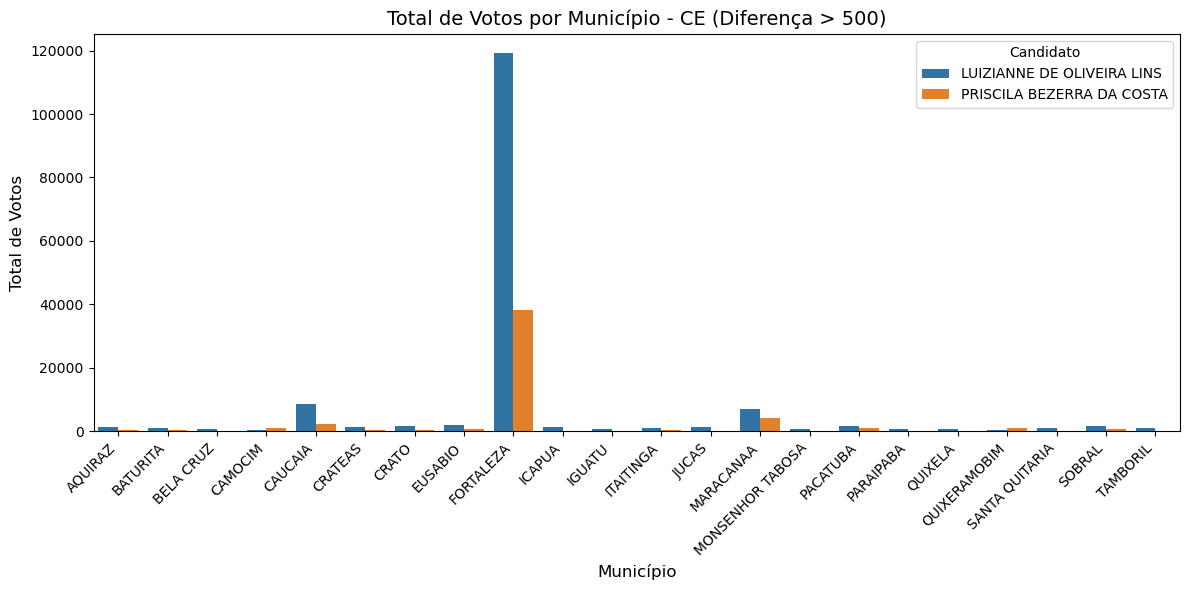

In [117]:
# Calcular a diferença de votos entre as candidatas
df_diff = df_aggregated.pivot_table(
    index='nome_municipio', 
    columns='nome_candidato', 
    values='total_votos', 
    aggfunc='sum', 
    fill_value=0
)

# Calcular a diferença de votos
df_diff['diferenca_votos'] = df_diff['PRISCILA BEZERRA DA COSTA'] - df_diff['LUIZIANNE DE OLIVEIRA LINS']

# Filtrar os municípios onde a diferença de votos é maior que 500
df_diff_filtrado = df_diff[abs(df_diff['diferenca_votos']) > 500].reset_index()

# Criar o gráfico com os dados filtrados
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_aggregated[df_aggregated['nome_municipio'].isin(df_diff_filtrado['nome_municipio'])],
    x='nome_municipio',  # Municípios no eixo X
    y='total_votos',     # Total de votos no eixo Y
    hue='nome_candidato' # Diferenciar por candidato
)

# Ajustar os rótulos e título
plt.xticks(rotation=45, ha='right')  # Rotacionar os nomes dos municípios
plt.xlabel('Município', fontsize=12)
plt.ylabel('Total de Votos', fontsize=12)
plt.title('Total de Votos por Município - CE (Diferença > 500)', fontsize=14)
plt.legend(title='Candidato')

# Exibir o gráfico
plt.tight_layout()
plt.show()


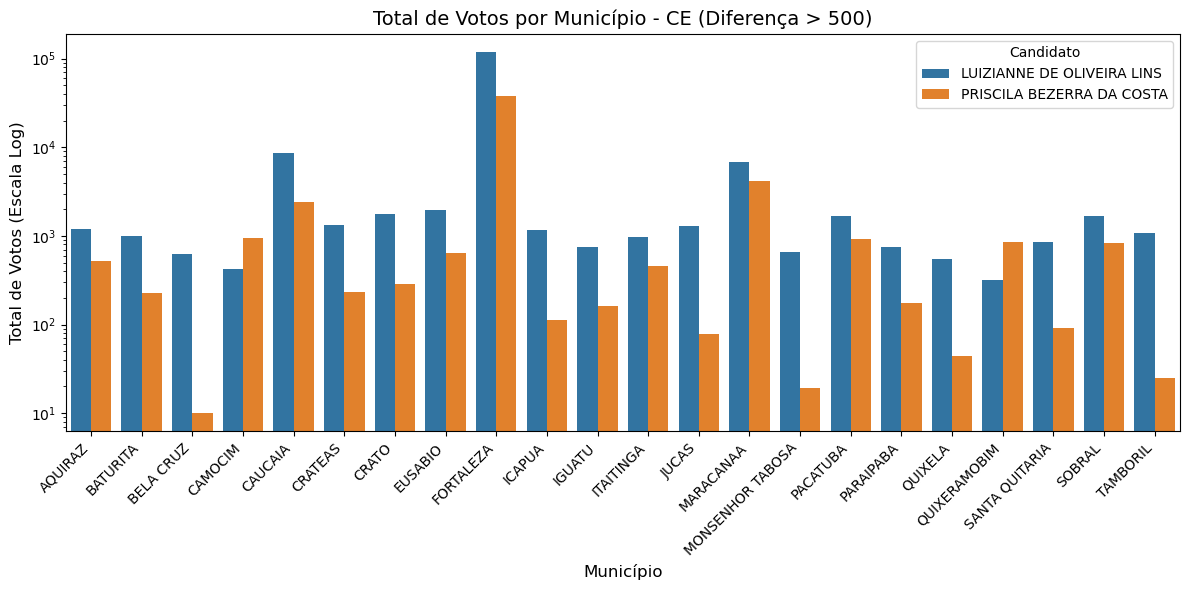

In [118]:
# Criar o gráfico com os dados filtrados
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_aggregated[df_aggregated['nome_municipio'].isin(df_diff_filtrado['nome_municipio'])],
    x='nome_municipio',  # Municípios no eixo X
    y='total_votos',     # Total de votos no eixo Y
    hue='nome_candidato' # Diferenciar por candidato
)

# Ajustar os rótulos e título
plt.xticks(rotation=45, ha='right')  # Rotacionar os nomes dos municípios
plt.yscale('log')  # Definir escala logarítmica no eixo Y
plt.xlabel('Município', fontsize=12)
plt.ylabel('Total de Votos (Escala Log)', fontsize=12)
plt.title('Total de Votos por Município - CE (Diferença > 500)', fontsize=14)
plt.legend(title='Candidato')

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [119]:
df_diretorios_municipio = pd.read_csv('./dados/diretorios_municipio.csv', header=0, sep=',')

# df_diretorios_municipio.info()

# Fazer o merge com nomes de colunas diferentes
df_merged = pd.merge(
    df_aggregated,                     # Dados agregados dos votos por município
    df_diretorios_municipio,           # Dados adicionais dos municípios
    left_on='nome_municipio',          # Coluna do DataFrame de votos
    right_on='nome',                   # Coluna do DataFrame de diretórios
    how='inner'                        # Tipo de merge (apenas municípios correspondentes)
)

# Agregar os votos por região intermediária e candidato
df_regiao_intermediaria = (
    df_merged.groupby(['nome_regiao_intermediaria', 'nome_candidato'], as_index=False)
    .agg({'total_votos': 'sum'})
)

# Exibir o resultado
print(df_regiao_intermediaria)



Empty DataFrame
Columns: [nome_regiao_intermediaria, nome_candidato, total_votos]
Index: []


In [120]:
!pip install pysal geopandas matplotlib
!pip install -U libpysal esda

In [121]:
import geopandas as gpd
from shapely.geometry import Polygon

!pip install shapely
import shapely.wkt

In [122]:
df_diretorios_municipio = pd.merge(df_diretorios_municipio, df_mapas_municipio, on='id_municipio')

# Assuming 'geometria' column contains WKT strings:
df_diretorios_municipio['geometria'] = df_diretorios_municipio['geometria'].apply(shapely.wkt.loads)

# Now create the GeoDataFrame:
data = gpd.GeoDataFrame(df_diretorios_municipio, geometry='geometria')

print(data)

     id_municipio  id_municipio_6  id_municipio_tse  id_municipio_rf  \
0         2308906          230890             14796             1479   
1         2307908          230790             14591             1459   
2         2307254          230725             13005              985   
3         2306553          230655             15954             1595   
4         2302305          230230             13455             1345   
..            ...             ...               ...              ...   
179       2308302          230830             14672             1467   
180       2307205          230720             14451             1445   
181       2310605          231060             15130             1513   
182       2302503          230250             13498             1349   
183       2300101          230010             13013             1301   

     id_municipio_bcb                    nome  capital_uf  id_comarca  \
0               39882               Morrinhos           0     

In [123]:
from pysal.lib import weights

# Matriz de pesos baseados em vizinhança
w_queen = weights.Queen.from_dataframe(data)  # Queen: considera bordas e vértices
# w = Rook.from_dataframe(data)  # Rook: apenas bordas compartilhadas

# Normalizar a matriz de pesos
w_queen.transform = 'r'  # Normalização (linhas somam 1)

C:\Users\joaov\AppData\Local\Temp\ipykernel_23076\1627548085.py:4: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = weights.Queen.from_dataframe(data)  # Queen: considera bordas e vértices


In [124]:
from esda.moran import Moran

# Variável de interesse (ex.: 'renda') - Certifique-se de que a coluna 'renda' existe no seu DataFrame
# Se a coluna não existir, substitua 'renda' pelo nome da coluna correta
y = data["id_municipio"].values

# Calcular o índice de Moran
moran = Moran(y, w_queen)  # Use w_queen aqui

print(f"Índice de Moran: {moran.I}")
print(f"p-valor: {moran.p_sim}")  # p < 0.05 indica autocorrelação significativa

Índice de Moran: 0.045818756415007565
p-valor: 0.131
